In [ ]:
# Step 1: Install gdown if not already installed
!pip install -q gdown

# Step 2: Import libraries
import gdown
import pandas as pd

# Step 3: Define dictionary of files with their Google Drive file IDs
file_links = {
    'sales.csv': '1nlHb3oxJTxPTq5b92qDLdNqL2GIbXV8y',         # Replace only if updated
    'products.csv':        '1N5XsqeCFzK7qNRVgM3Xr-DsKpcLxSqsN',
    'employees.csv':       '1DSEnfhO6DCa3TM5j4ovYSPbpxnBwPPF0',
    'customers.csv':       '1NUljelPD7QNj2P8lpfw_GFVEMn3qIBpI',
    'cities.csv':          '1RjUGDpmjfyesPFFVXCkWzarpCQkQqB-6',
    'countries.csv':       '16U5aSAhje_3DhVzs9ZxL5RzGYXW-ObHL',
    'categories.csv':      '1YXDRMoyROteD_fdwNZBOGiIFJam-SxkD'
}

# Step 4: Download each file
for output_file, file_id in file_links.items():
    if "REPLACE_WITH_FILE_ID" not in file_id:
        url = f"https://drive.google.com/uc?id={file_id}"
        print(f"📥 Downloading {output_file}...")
        gdown.download(url, output_file, quiet=False)
    else:
        print(f"❗ File ID missing for: {output_file} — please update.")

# Step 5: Load all data into Pandas DataFrames
sales = pd.read_csv('sales.csv')
products = pd.read_csv('products.csv')
employees = pd.read_csv('employees.csv')
customers = pd.read_csv('customers.csv')
cities = pd.read_csv('cities.csv')
countries = pd.read_csv('countries.csv')
categories = pd.read_csv('categories.csv')

# Step 6: Preview one file to confirm
sales.tail(2)
products.tail(2)
employees.tail(2)
customers.tail(2)
cities.tail(2)
countries.tail(2)
categories.tail(2)


📥 Downloading sales.csv...


Downloading...
From (original): https://drive.google.com/uc?id=1nlHb3oxJTxPTq5b92qDLdNqL2GIbXV8y
From (redirected): https://drive.google.com/uc?id=1nlHb3oxJTxPTq5b92qDLdNqL2GIbXV8y&confirm=t&uuid=22742b8b-680c-4511-8215-2ad8a155e1f2
To: /content/sales.csv
100%|██████████| 517M/517M [00:10<00:00, 51.6MB/s]


📥 Downloading products.csv...


Downloading...
From: https://drive.google.com/uc?id=1N5XsqeCFzK7qNRVgM3Xr-DsKpcLxSqsN
To: /content/products.csv
100%|██████████| 36.8k/36.8k [00:00<00:00, 39.1MB/s]


📥 Downloading employees.csv...


Downloading...
From: https://drive.google.com/uc?id=1DSEnfhO6DCa3TM5j4ovYSPbpxnBwPPF0
To: /content/employees.csv
100%|██████████| 1.72k/1.72k [00:00<00:00, 4.95MB/s]


📥 Downloading customers.csv...


Downloading...
From: https://drive.google.com/uc?id=1NUljelPD7QNj2P8lpfw_GFVEMn3qIBpI
To: /content/customers.csv
100%|██████████| 4.44M/4.44M [00:00<00:00, 21.8MB/s]


📥 Downloading cities.csv...


Downloading...
From: https://drive.google.com/uc?id=1RjUGDpmjfyesPFFVXCkWzarpCQkQqB-6
To: /content/cities.csv
100%|██████████| 2.17k/2.17k [00:00<00:00, 7.01MB/s]


📥 Downloading countries.csv...


Downloading...
From: https://drive.google.com/uc?id=16U5aSAhje_3DhVzs9ZxL5RzGYXW-ObHL
To: /content/countries.csv
100%|██████████| 3.18k/3.18k [00:00<00:00, 6.86MB/s]


📥 Downloading categories.csv...


Downloading...
From: https://drive.google.com/uc?id=1YXDRMoyROteD_fdwNZBOGiIFJam-SxkD
To: /content/categories.csv
100%|██████████| 137/137 [00:00<00:00, 722kB/s]


,CategoryID,CategoryName
9,10,Snails
10,11,Produce


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sales.tail(2)
products.tail(2)
employees.tail(2)
customers.tail(2)
cities.tail(2)
countries.tail(2)
categories.tail(2)

,CategoryID,CategoryName
9,10,Snails
10,11,Produce


In [ ]:
# Check for missing values
for df, name in zip([sales, categories, cities, countries, customers, employees, products],
                    ["sales", "categories", "cities", "countries", "customers", "employees", "products"]):
    print(f"Missing values in {name}: {df.isnull().sum().sum()}")

Missing values in sales: 67526
Missing values in categories: 0
Missing values in cities: 0
Missing values in countries: 1
Missing values in customers: 977
Missing values in employees: 0
Missing values in products: 0


In [ ]:
# Step 1: Merge customer info first
customers = customers.merge(cities, on='CityID', how='left')
customers = customers.merge(countries, on='CountryID', how='left')

# Step 2: Merge employee info
employees = employees.merge(cities, on='CityID', how='left')
employees = employees.merge(countries, on='CountryID', how='left')

# Step 3: Merge into main df
df = sales.merge(products, on='ProductID', how='left')
df = df.merge(customers, on='CustomerID', how='left')
df = df.merge(employees, left_on='SalesPersonID', right_on='EmployeeID', how='left')
df = df.merge(categories, on='CategoryID', how='left')


In [ ]:
df.shape

(6758125, 41)

In [ ]:
df.columns



Index(['SalesID', 'SalesPersonID', 'CustomerID', 'ProductID', 'Quantity',
       'Discount', 'TotalPrice', 'SalesDate', 'TransactionNumber',
       'ProductName', 'Price', 'CategoryID', 'Class', 'ModifyDate',
       'Resistant', 'IsAllergic', 'VitalityDays', 'FirstName_x',
       'MiddleInitial_x', 'LastName_x', 'CityID_x', 'Address', 'CityName_x',
       'Zipcode_x', 'CountryID_x', 'CountryName_x', 'CountryCode_x',
       'EmployeeID', 'FirstName_y', 'MiddleInitial_y', 'LastName_y',
       'BirthDate', 'Gender', 'CityID_y', 'HireDate', 'CityName_y',
       'Zipcode_y', 'CountryID_y', 'CountryName_y', 'CountryCode_y',
       'CategoryName'],
      dtype='object')

In [ ]:
df.dtypes

,0
SalesID,int64
SalesPersonID,int64
CustomerID,int64
ProductID,int64
Quantity,int64
Discount,float64
TotalPrice,float64
SalesDate,object
TransactionNumber,object
ProductName,object


In [ ]:
df.head()


,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,ProductName,...,BirthDate,Gender,CityID_y,HireDate,CityName_y,Zipcode_y,CountryID_y,CountryName_y,CountryCode_y,CategoryName
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,Vaccum Bag 10x13,...,1987-01-13 00:00:00.000,M,65,2013-06-22 13:20:18.080,Baltimore,89197,32,United States,AR,Confections
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,Sardines,...,1951-07-07 00:00:00.000,M,28,2017-02-10 11:21:26.650,Tucson,34760,32,United States,AR,Grain
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,Crab - Imitation Flakes,...,1963-04-18 00:00:00.000,M,68,2011-12-12 10:43:52.940,Anchorage,29493,32,United States,AR,Produce
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,Smirnoff Green Apple Twist,...,1956-12-13 00:00:00.000,M,18,2014-10-14 23:12:53.420,Little Rock,81251,32,United States,AR,Seafood
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,Coffee - Dark Roast,...,1963-12-30 00:00:00.000,M,9,2012-07-23 15:02:12.640,Atlanta,66212,32,United States,AR,Poultry


In [ ]:
df.tail()


,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,ProductName,...,BirthDate,Gender,CityID_y,HireDate,CityName_y,Zipcode_y,CountryID_y,CountryName_y,CountryCode_y,CategoryName
6758120,6758121,10,50938,300,13,0.0,0.0,2018-04-20 22:39:03.150,AHVBHVO7632V5YYD2VJT,"Beans - Kidney, Canned",...,1963-12-30 00:00:00.000,M,9,2012-07-23 15:02:12.640,Atlanta,66212,32,United States,AR,Beverages
6758121,6758122,18,85668,452,22,0.1,0.0,2018-01-13 15:08:18.700,M4IA0FS13J9F0GJD4BX8,Napkin White - Starched,...,1964-03-09 00:00:00.000,M,58,2010-02-22 21:55:48.620,Columbus,87987,32,United States,AR,Produce
6758122,6758123,21,68409,405,18,0.0,0.0,2018-01-18 12:05:16.950,7VZJ77UGBSX2SNCC1GFW,Pastry - Raisin Muffin - Mini,...,1966-04-25 00:00:00.000,M,65,2016-01-24 02:13:24.340,Baltimore,89197,32,United States,AR,Produce
6758123,6758124,17,90315,104,23,0.0,0.0,2018-02-26 08:13:37.850,3JTF5IF0YJLLXF9IRS8X,Tia Maria,...,1989-08-29 00:00:00.000,M,80,2010-07-11 09:23:03.490,New Orleans,35640,32,United States,AR,Beverages
6758124,6758125,16,45667,305,12,0.0,0.0,2018-04-17 15:26:30.270,RRBD7S603UIC73B631OF,Pastry - Cheese Baked Scones,...,1951-07-07 00:00:00.000,M,28,2017-02-10 11:21:26.650,Tucson,34760,32,United States,AR,Grain


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 41 columns):
 #   Column             Dtype  
---  ------             -----  
 0   SalesID            int64  
 1   SalesPersonID      int64  
 2   CustomerID         int64  
 3   ProductID          int64  
 4   Quantity           int64  
 5   Discount           float64
 6   TotalPrice         float64
 7   SalesDate          object 
 8   TransactionNumber  object 
 9   ProductName        object 
 10  Price              float64
 11  CategoryID         int64  
 12  Class              object 
 13  ModifyDate         object 
 14  Resistant          object 
 15  IsAllergic         object 
 16  VitalityDays       float64
 17  FirstName_x        object 
 18  MiddleInitial_x    object 
 19  LastName_x         object 
 20  CityID_x           int64  
 21  Address            object 
 22  CityName_x         object 
 23  Zipcode_x          int64  
 24  CountryID_x        int64  
 25  CountryName_x     

In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
SalesDate,67526
MiddleInitial_x,67167
SalesID,0
ProductID,0
SalesPersonID,0
Quantity,0
Discount,0
TotalPrice,0
CustomerID,0
TransactionNumber,0


In [ ]:
df.isnull().mean().sort_values(ascending=False) * 100


,0
SalesDate,0.999182
MiddleInitial_x,0.993870
SalesID,0.000000
ProductID,0.000000
SalesPersonID,0.000000
Quantity,0.000000
Discount,0.000000
TotalPrice,0.000000
CustomerID,0.000000
TransactionNumber,0.000000


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df = df.dropna(subset=['SalesDate'])


In [ ]:
df['MiddleInitial_x'] = df['MiddleInitial_x'].fillna('')


In [ ]:
df.describe(include='all')


,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,ProductName,...,BirthDate,Gender,CityID_y,HireDate,CityName_y,Zipcode_y,CountryID_y,CountryName_y,CountryCode_y,CategoryName
count,6.690599e+06,6.690599e+06,6.690599e+06,6.690599e+06,6.690599e+06,6.690599e+06,6690599.0,6690599,6690599,6690599,...,6690599,6690599,6.690599e+06,6690599,6690599,6.690599e+06,6690599.0,6690599,6690599,6690599
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6670068,6690599,452,...,23,2,NaN,23,18,NaN,NaN,1,1,11
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-22 00:55:15.420,RRBD7S603UIC73B631OF,Longos - Chicken Wings,...,1966-04-25 00:00:00.000,M,NaN,2016-01-24 02:13:24.340,Lubbock,NaN,NaN,United States,AR,Confections
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,15215,...,292024,4364817,NaN,292024,874060,NaN,NaN,6690599,6690599,843466
mean,3.379160e+06,1.199968e+01,4.939504e+04,2.265522e+02,1.300385e+01,2.996458e-02,0.0,NaN,NaN,NaN,...,NaN,NaN,4.377161e+01,NaN,NaN,5.233178e+04,32.0,NaN,NaN,NaN
std,1.950887e+06,6.632756e+00,2.850614e+04,1.304742e+02,7.209986e+00,6.397781e-02,0.0,NaN,NaN,NaN,...,NaN,NaN,2.579711e+01,NaN,NaN,2.791918e+04,0.0,NaN,NaN,NaN
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,...,NaN,NaN,4.000000e+00,NaN,NaN,4.150000e+02,32.0,NaN,NaN,NaN
25%,1.689668e+06,6.000000e+00,2.470300e+04,1.140000e+02,7.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,...,NaN,NaN,1.800000e+01,NaN,NaN,3.437500e+04,32.0,NaN,NaN,NaN
50%,3.379225e+06,1.200000e+01,4.941300e+04,2.270000e+02,1.300000e+01,0.000000e+00,0.0,NaN,NaN,NaN,...,NaN,NaN,3.900000e+01,NaN,NaN,5.535800e+04,32.0,NaN,NaN,NaN
75%,5.068618e+06,1.800000e+01,7.407700e+04,3.400000e+02,1.900000e+01,0.000000e+00,0.0,NaN,NaN,NaN,...,NaN,NaN,6.500000e+01,NaN,NaN,8.167800e+04,32.0,NaN,NaN,NaN


In [ ]:
df.describe()


,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,Price,CategoryID,VitalityDays,CityID_x,Zipcode_x,CountryID_x,EmployeeID,CityID_y,Zipcode_y,CountryID_y
count,6.690599e+06,6.690599e+06,6.690599e+06,6.690599e+06,6.690599e+06,6.690599e+06,6690599.0,6.690599e+06,6.690599e+06,6.690599e+06,6.690599e+06,6.690599e+06,6690599.0,6.690599e+06,6.690599e+06,6.690599e+06,6690599.0
mean,3.379160e+06,1.199968e+01,4.939504e+04,2.265522e+02,1.300385e+01,2.996458e-02,0.0,5.082559e+01,5.864255e+00,2.603362e+01,4.858283e+01,5.127954e+04,32.0,1.199968e+01,4.377161e+01,5.233178e+04,32.0
std,1.950887e+06,6.632756e+00,2.850614e+04,1.304742e+02,7.209986e+00,6.397781e-02,0.0,2.857334e+01,3.267914e+00,3.902472e+01,2.766061e+01,2.976435e+04,0.0,6.632756e+00,2.579711e+01,2.791918e+04,0.0
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.0,4.490000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.570000e+02,32.0,1.000000e+00,4.000000e+00,4.150000e+02,32.0
25%,1.689668e+06,6.000000e+00,2.470300e+04,1.140000e+02,7.000000e+00,0.000000e+00,0.0,2.657760e+01,3.000000e+00,0.000000e+00,2.500000e+01,2.187400e+04,32.0,6.000000e+00,1.800000e+01,3.437500e+04,32.0
50%,3.379225e+06,1.200000e+01,4.941300e+04,2.270000e+02,1.300000e+01,0.000000e+00,0.0,5.263670e+01,6.000000e+00,0.000000e+00,4.900000e+01,5.135200e+04,32.0,1.200000e+01,3.900000e+01,5.535800e+04,32.0
75%,5.068618e+06,1.800000e+01,7.407700e+04,3.400000e+02,1.900000e+01,0.000000e+00,0.0,7.524860e+01,9.000000e+00,5.200000e+01,7.200000e+01,8.056300e+04,32.0,1.800000e+01,6.500000e+01,8.167800e+04,32.0
max,6.758125e+06,2.300000e+01,9.875900e+04,4.520000e+02,2.500000e+01,2.000000e-01,0.0,9.987550e+01,1.100000e+01,1.200000e+02,9.600000e+01,9.785900e+04,32.0,2.300000e+01,9.200000e+01,9.098900e+04,32.0


In [ ]:
df.describe(include='object')
df.select_dtypes(include='object').nunique().sort_values()


,0
CountryName_x,1
CountryCode_x,1
CountryName_y,1
CountryCode_y,1
Gender,2
IsAllergic,3
Class,3
Resistant,3
CategoryName,11
MiddleInitial_y,14


###EDA


In [ ]:
df['SalesDate'] = pd.to_datetime(df['SalesDate'], errors='coerce')


In [ ]:
df['Month'] = df['SalesDate'].dt.to_period('M')

In [ ]:
df['TotalSalesRevenue'] = df['Quantity'] * df['Price'] * (1 - df['Discount'])


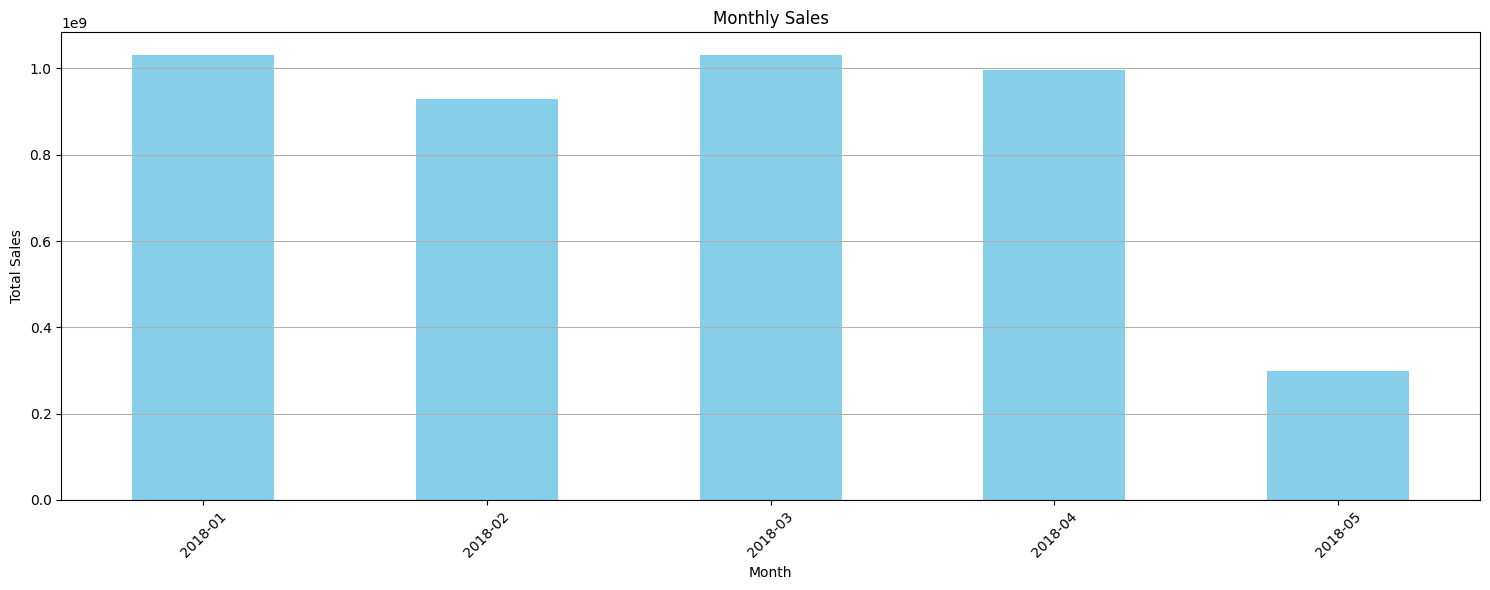

In [ ]:

df['SalesDate'] = pd.to_datetime(df['SalesDate'], errors='coerce')
df['YearMonth'] = df['SalesDate'].dt.to_period('M')

monthly_sales = df.groupby('YearMonth')['TotalSalesRevenue'].sum()

monthly_sales.plot(kind='bar', figsize=(15, 6), title='Monthly Sales', color='skyblue')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

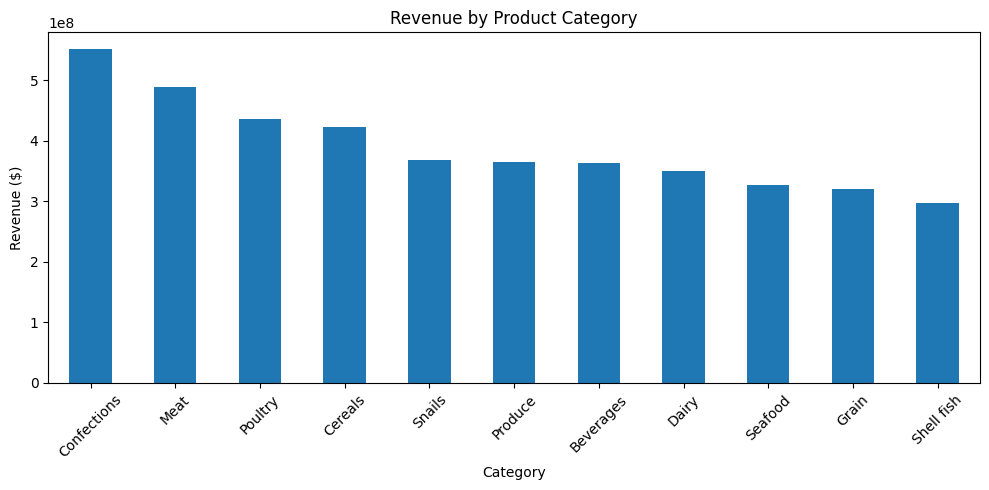

In [ ]:
##Product Category Revenue
cat_revenue = df.groupby('CategoryName')['TotalSalesRevenue'].sum().sort_values(ascending=False)
cat_revenue.plot(kind='bar', figsize=(10, 5), title='Revenue by Product Category')
plt.ylabel('Revenue ($)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


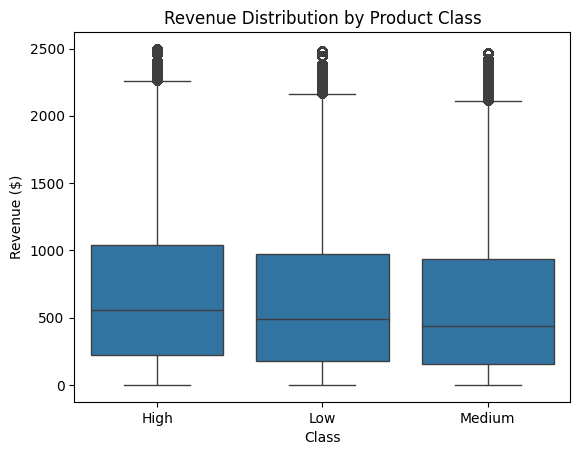

In [ ]:
# Revenue by Product Class
sns.boxplot(data=df, x='Class', y='TotalSalesRevenue')
plt.title('Revenue Distribution by Product Class')
plt.ylabel('Revenue ($)')
plt.show()


###EDA: customer-Level


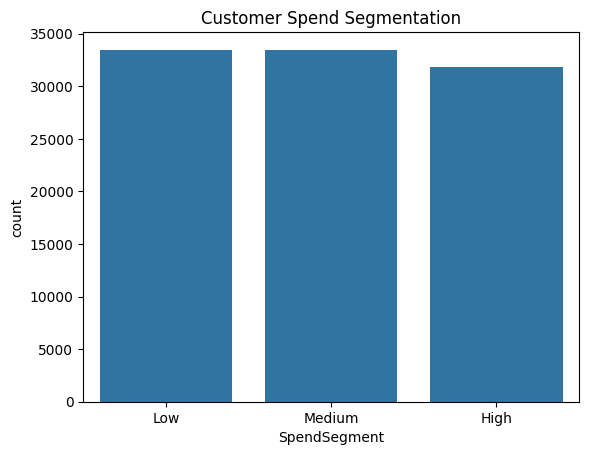

In [ ]:
#Customer Spend Segmentation
customer_spend = df.groupby('CustomerID')['TotalSalesRevenue'].sum()
df['SpendSegment'] = pd.qcut(df['CustomerID'].map(customer_spend), q=3, labels=['Low', 'Medium', 'High'])
sns.countplot(data=df.drop_duplicates(subset='CustomerID'), x='SpendSegment')
plt.title('Customer Spend Segmentation')
plt.show()


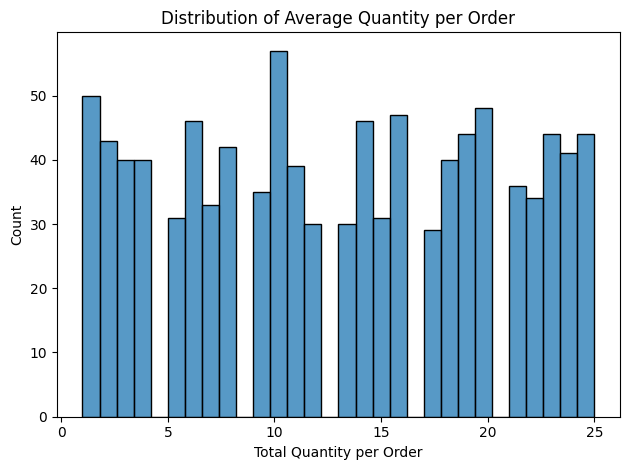

In [ ]:
#Avg Quantity per Order
order_avg = df.groupby('TransactionNumber')['Quantity'].sum()
sns.histplot(order_avg.sample(1000), bins=30)
plt.title('Distribution of Average Quantity per Order')
plt.xlabel('Total Quantity per Order')
plt.tight_layout()
plt.show()



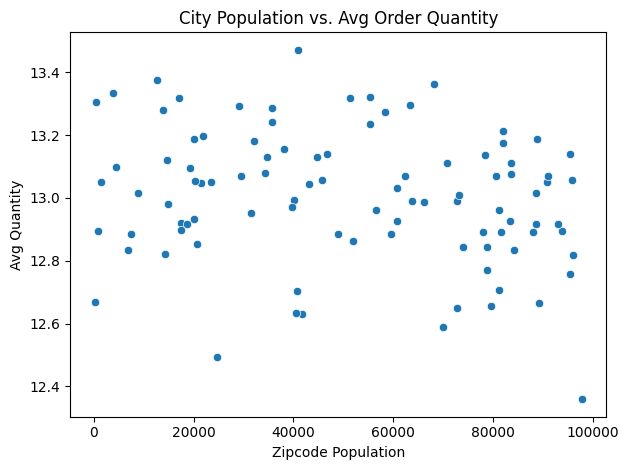

In [ ]:
#Zipcode (City Pop) vs Order Size
# Group by customer's city name and calculate mean Zipcode and Quantity
zip_pop_order = df.groupby('CityName_x')[['Zipcode_x', 'Quantity']].mean().dropna()

sns.scatterplot(data=zip_pop_order, x='Zipcode_x', y='Quantity')
plt.title('City Population vs. Avg Order Quantity')
plt.xlabel('Zipcode Population')
plt.ylabel('Avg Quantity')
plt.tight_layout()
plt.show()


###EDA Employee level


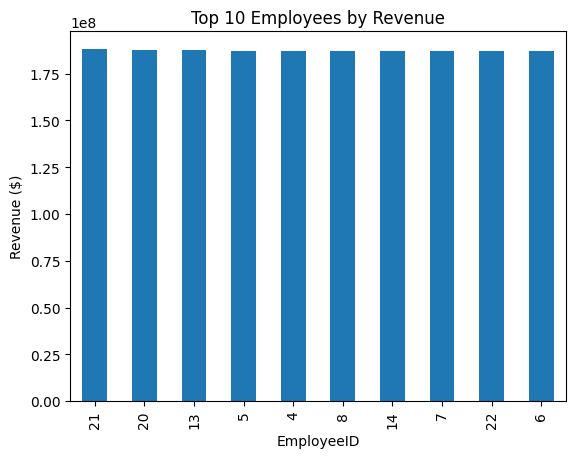

In [ ]:
emp_revenue = df.groupby('EmployeeID')['TotalSalesRevenue'].sum().sort_values(ascending=False)
emp_revenue.head(10).plot(kind='bar', title='Top 10 Employees by Revenue')
plt.ylabel('Revenue ($)')
plt.show()


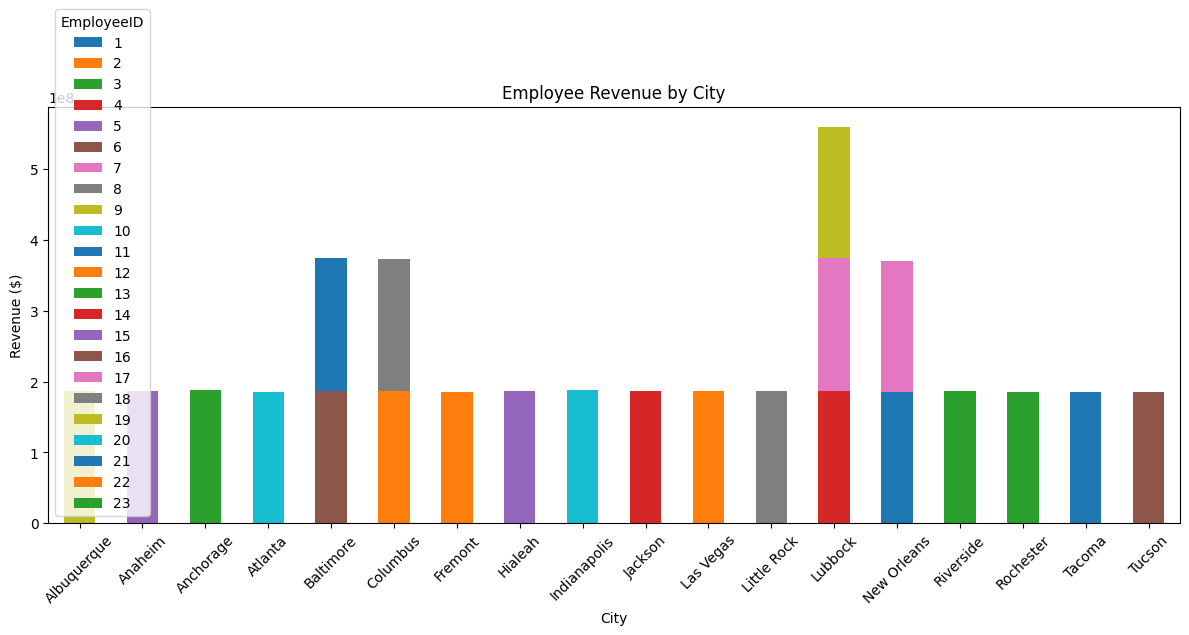

In [ ]:
emp_city = df.groupby(['CityName_y', 'EmployeeID'])['TotalSalesRevenue'].sum().reset_index()
pivot = emp_city.pivot(index='CityName_y', columns='EmployeeID', values='TotalSalesRevenue').fillna(0)
pivot.plot(kind='bar', stacked=True, figsize=(12,6), title='Employee Revenue by City')
plt.ylabel('Revenue ($)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



###EDA City Level

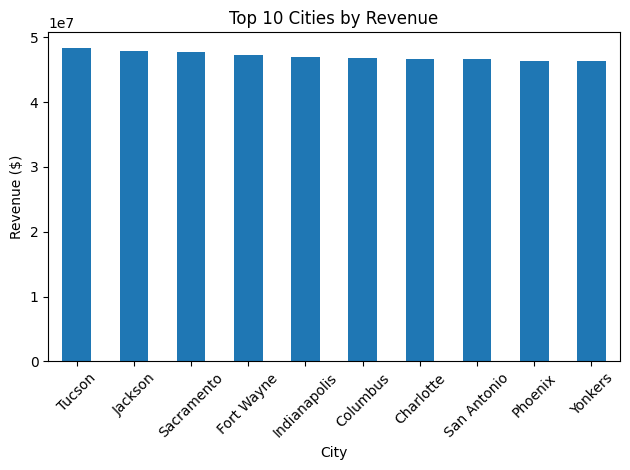

In [ ]:
#Revenue by City
city_rev = df.groupby('CityName_x')['TotalSalesRevenue'].sum().sort_values(ascending=False)
city_rev.head(10).plot(kind='bar', title='Top 10 Cities by Revenue')
plt.ylabel('Revenue ($)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###EDA: Time-Based

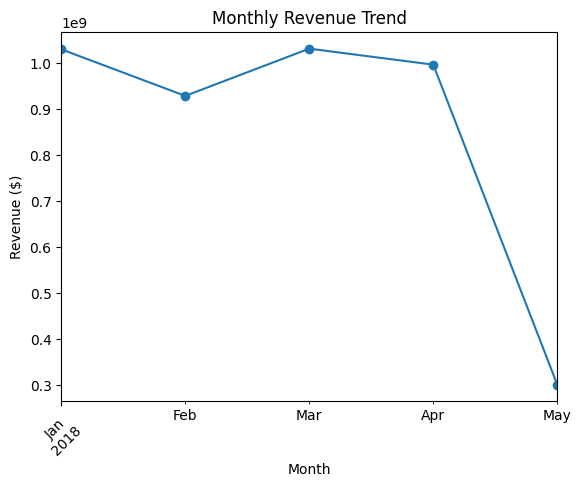

In [ ]:
#Monthly Revenue Trend
monthly_rev = df.groupby(df['SalesDate'].dt.to_period('M'))['TotalSalesRevenue'].sum()
monthly_rev.plot(marker='o', title='Monthly Revenue Trend')
plt.ylabel('Revenue ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()


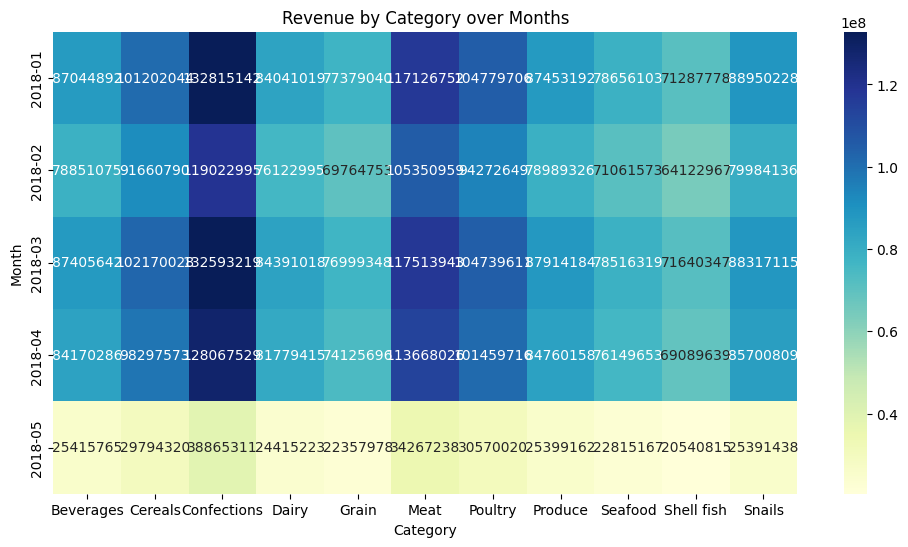

In [ ]:
#Category vs Month Heatmap
heatmap_data = df.groupby([df['SalesDate'].dt.to_period('M').astype(str), 'CategoryName'])['TotalSalesRevenue'].sum().unstack()
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Revenue by Category over Months')
plt.ylabel('Month')
plt.xlabel('Category')
plt.show()


#Hypothesis Test

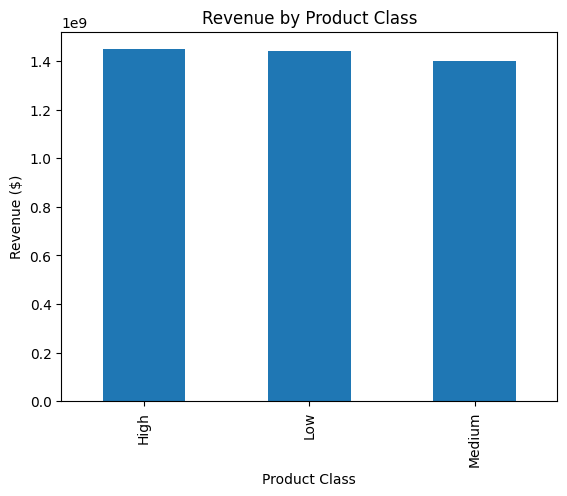

In [ ]:
#1) Premium products generate more revenue than standard ones
# Group by product class and calculate total revenue
revenue_by_class = df.groupby('Class')['TotalSalesRevenue'].sum().sort_values(ascending=False)

# Plot
revenue_by_class.plot(kind='bar', title='Revenue by Product Class', ylabel='Revenue ($)', xlabel='Product Class')
plt.show()


In [ ]:
#2) Discounts above 15% lead to higher quantities sold but lower revenue
df['HighDiscount'] = df['Discount'] > 15


discount_analysis = df.groupby('HighDiscount')[['Quantity', 'TotalSalesRevenue']].mean()

print(discount_analysis)


              Quantity  TotalSalesRevenue
HighDiscount                             
False         13.00385         641.084876


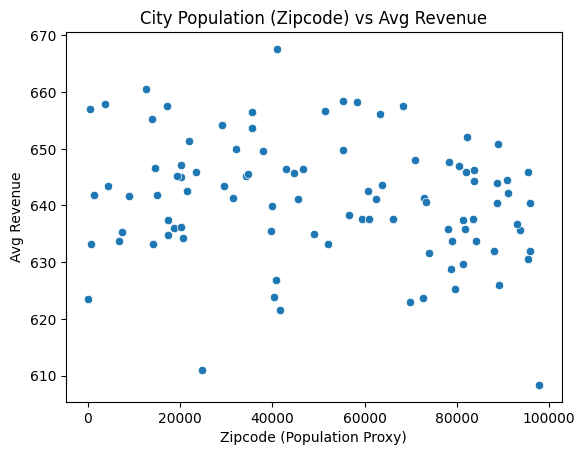

In [ ]:
#3) Customers in high-population cities spend more
# Average revenue per order by city
city_revenue = df.groupby('CityName_x')[['Zipcode_x', 'TotalSalesRevenue']].mean().dropna()

# Scatter plot to visualize correlation
sns.scatterplot(data=city_revenue, x='Zipcode_x', y='TotalSalesRevenue')
plt.title('City Population (Zipcode) vs Avg Revenue')
plt.xlabel('Zipcode (Population Proxy)')
plt.ylabel('Avg Revenue')
plt.show()


In [ ]:
#correlation
correlation = city_revenue['Zipcode_x'].corr(city_revenue['TotalSalesRevenue'])
print(f"Correlation between city population and avg revenue: {correlation:.2f}")


Correlation between city population and avg revenue: -0.20


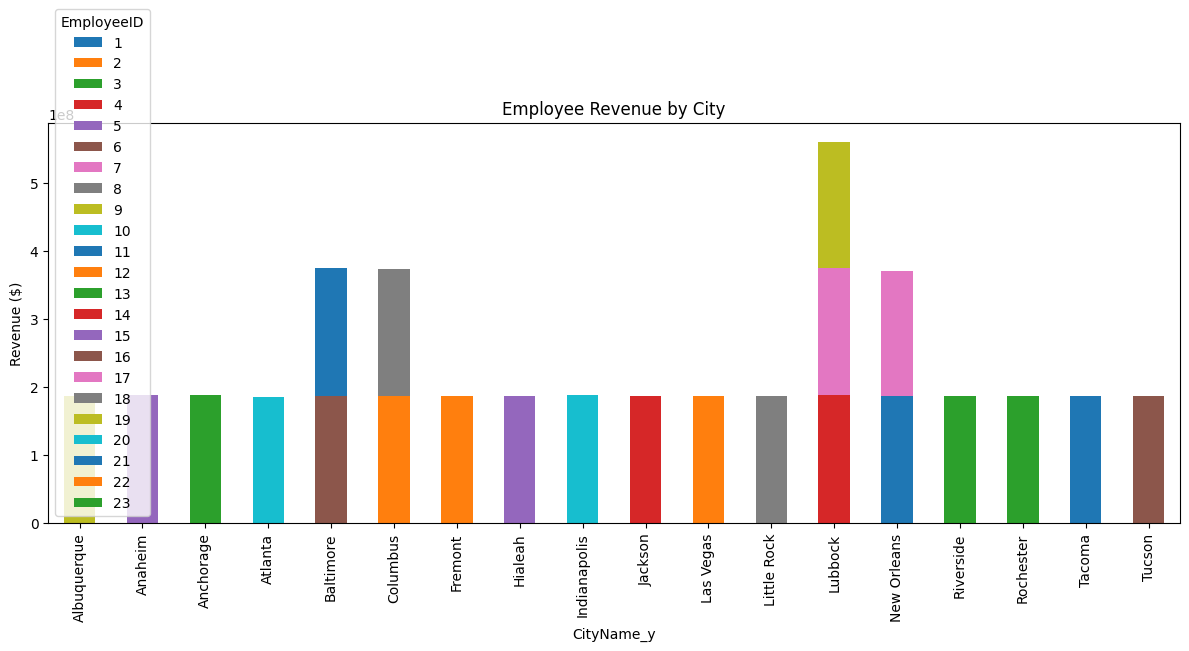

In [ ]:
# 4) Certain employees consistently outperform others in similar regions
# Group by city and employee to see revenue per employee per city
emp_city_rev = df.groupby(['CityName_y', 'EmployeeID'])['TotalSalesRevenue'].sum().reset_index()

# Pivot for visual clarity
pivot = emp_city_rev.pivot(index='CityName_y', columns='EmployeeID', values='TotalSalesRevenue').fillna(0)

# Stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(12,6), title='Employee Revenue by City')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()


In [ ]:
# 5) Customers in the "High" spend segment purchase more frequently and generate more revenue
# Create SpendSegment based on TotalSalesRevenue quantiles (Low, Medium, High)
df['SpendSegment'] = pd.qcut(df['TotalSalesRevenue'], q=3, labels=['Low', 'Medium', 'High'])

# Now group by SpendSegment and analyze
segment_analysis = df.groupby('SpendSegment').agg({
    'TransactionNumber': pd.Series.nunique,
    'TotalSalesRevenue': 'sum',
    'Quantity': 'sum'
}).rename(columns={
    'TransactionNumber': 'UniqueOrders',
    'TotalSalesRevenue': 'TotalRevenue',
    'Quantity': 'TotalQuantity'
}).sort_values(by='TotalRevenue', ascending=False)

print(segment_analysis)



<ipython-input-43-1467139396>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = df.groupby('SpendSegment').agg({


              UniqueOrders  TotalRevenue  TotalQuantity
SpendSegment                                           
High               2229774  2.898415e+09       41728885
Medium             2230256  1.125612e+09       27288499
Low                2230569  2.652146e+08       17986163
